In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('../BD/Supermercado.csv')


In [3]:
df.shape

(2019501, 12)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
week_days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['day'] = df['order_dow'].map(week_days)

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Wednesday
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Wednesday
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Wednesday
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Wednesday
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Wednesday


#### Key del Dataset
order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

order_hour_of_day – (Time of the order)

days_since_prior_order - (History of the order)

product_id – (Id of the product)

add_to_cart_order – (Number of items added to cart)

reordered – (If the reorder took place)

department_id - (Unique number allocated to each department)

department – (Names of the departments)

product_name – (Name of the products)


https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/code

#### Info basica DF

A continuacion se revisa la estructura general del dataset.

In [6]:
df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Wednesday
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Wednesday
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Wednesday
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Wednesday
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Wednesday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  day                     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 200.3+ MB


In [8]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2019501.00,2019501.00,2019501.00,2019501.00,2019501.00,1895159.00,2019501.00,2019501.00,2019501.00,2019501.00
mean,1707012.76,103067.27,17.15,2.74,13.44,11.39,71.21,8.36,0.59,9.93
std,985983.20,59491.17,17.53,2.09,4.24,8.97,38.21,7.15,0.49,6.28
min,10.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,852649.00,51584.00,5.00,1.00,10.00,5.00,31.00,3.00,0.00,4.00
50%,1705004.00,102690.00,11.00,3.00,13.00,8.00,83.00,6.00,1.00,9.00
75%,2559031.00,154600.00,24.00,5.00,16.00,15.00,107.00,11.00,1.00,16.00
max,3421080.00,206209.00,100.00,6.00,23.00,30.00,134.00,137.00,1.00,21.00


In [9]:
print(df.describe())

        order_id    user_id  order_number  order_dow  order_hour_of_day  \
count 2019501.00 2019501.00    2019501.00 2019501.00         2019501.00   
mean  1707012.76  103067.27         17.15       2.74              13.44   
std    985983.20   59491.17         17.53       2.09               4.24   
min        10.00       2.00          1.00       0.00               0.00   
25%    852649.00   51584.00          5.00       1.00              10.00   
50%   1705004.00  102690.00         11.00       3.00              13.00   
75%   2559031.00  154600.00         24.00       5.00              16.00   
max   3421080.00  206209.00        100.00       6.00              23.00   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
count              1895159.00  2019501.00         2019501.00 2019501.00   
mean                    11.39       71.21               8.36       0.59   
std                      8.97       38.21               7.15       0.49   
min                     

Se revisa si existe algun valor nulo dentro del dataset.

In [10]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
day                            0
dtype: int64

Dado que el objetivo es crear un aloritmo de clasificacion, se eliminan las filas nulas del dataset.

In [11]:
df = df.dropna()

Finalmente, se valida de que efectivamente se hayan eliminado los valores nulos.

In [12]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
day                       0
dtype: int64

Se valida de que no existan valores duplicados en el dataset.

In [13]:
df.duplicated().sum()

0

Se analiza la cantidad de valores únicos dentro del dataset.

In [14]:
df.nunique()

order_id                  187746
user_id                    98918
order_number                  99
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
day                            7
dtype: int64

Se realiza el conteo de ocurrencia de cada variable "department", de manera de obtener cuales son las categorías de producto más solicitadas.

In [15]:
department_counts = df['department'].value_counts()
product_name_counts = df['product_name'].value_counts()

print("Department counts:\n", department_counts)
print("\nProduct name counts:\n", product_name_counts)

Department counts:
 department
produce            553916
dairy eggs         316966
snacks             169855
beverages          158100
frozen             130049
pantry             108800
bakery              68430
canned goods        61844
deli                60934
dry goods pasta     50475
household           43239
breakfast           41733
meat seafood        41484
personal care       26154
babies              24633
international       15530
alcohol              8663
pets                 5622
missing              4608
other                2088
bulk                 2036
Name: count, dtype: int64

Product name counts:
 product_name
fresh fruits                  213224
fresh vegetables              199526
packaged vegetables fruits    103016
yogurt                         85176
packaged cheese                57683
                               ...  
kitchen supplies                 517
baby accessories                 476
baby bath body care              473
beauty                      

#### Ventas segun Dia y Momento del Dia

A continuación se procede a realizar el análisis de ventas considerando los diferentes días, horarios y combinaciones de ambos.

In [16]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,162876
11,11,159915
14,14,157495
15,15,156790
13,13,155976
12,12,153216
16,16,147884
9,9,141713
17,17,120847
8,8,101008


El ranking de compras por hora arroja que la mayor parte de las compras se centraliza en el horario que va desde las 10:00 hasta las 16:00. Siendo el horario de las 10:00 el que centraliza la mayor parte de compras realizadas.

A continuación se realiza el análisis de las compras por los diferentes días de la semana.

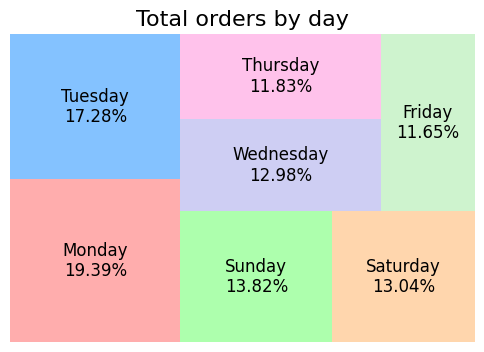

In [57]:
day_counts = df.groupby('day')['user_id'].count().sort_values(ascending=False)
day_percent = 100 * day_counts / day_counts.sum()

plt.figure(figsize=(6, 4))

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#C2F0C2']

squarify.plot(
    sizes=day_counts.values,
    label=[f"{day}\n{perc:.2f}%" for day, perc in zip(day_counts.index, day_percent)],
    alpha=0.8,
    color=colors,
    text_kwargs={'fontsize': 12}
)

plt.title('Total orders by day', fontsize=16)
plt.axis('off')
plt.show()

El gráfico muestra como los días lunes y martes son los que poseen mayor proporción de compras realizadas.

Con el objetivo de realizar una segmentación de horarios por parte del día, se procede a realizar un mapeo de horas, agrupandolas por los momentos: "Morning", "Afternoon", "Night" y "Down".

In [18]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Morning'
    if x in[13, 14, 15, 16, 17]:
        return 'Afternoon'
    if x in[18, 19, 20, 21, 22]:
        return 'Night'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Dawn'
    return x

Se almacena la el valor de momento del día en la variable "order_rime_list".

In [19]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list
1476310,3316446,114583,2,3,17,12.00,98,1,1,7,beverages,juice nectars,Thursday,Afternoon
292829,318255,177552,39,1,9,8.00,83,7,1,4,produce,fresh vegetables,Tuesday,Morning
1704727,2373518,154372,20,3,11,2.00,84,7,1,16,dairy eggs,milk,Thursday,Morning
45856,2844875,112467,4,6,8,13.00,83,11,1,4,produce,fresh vegetables,Sunday,Morning
722666,1065838,44581,7,5,12,22.00,9,9,0,9,dry goods pasta,pasta sauce,Saturday,Morning


Graficamos la cantidad de ordenes segun el momento del día.

<Axes: title={'center': 'Order by Moment of the Day'}>

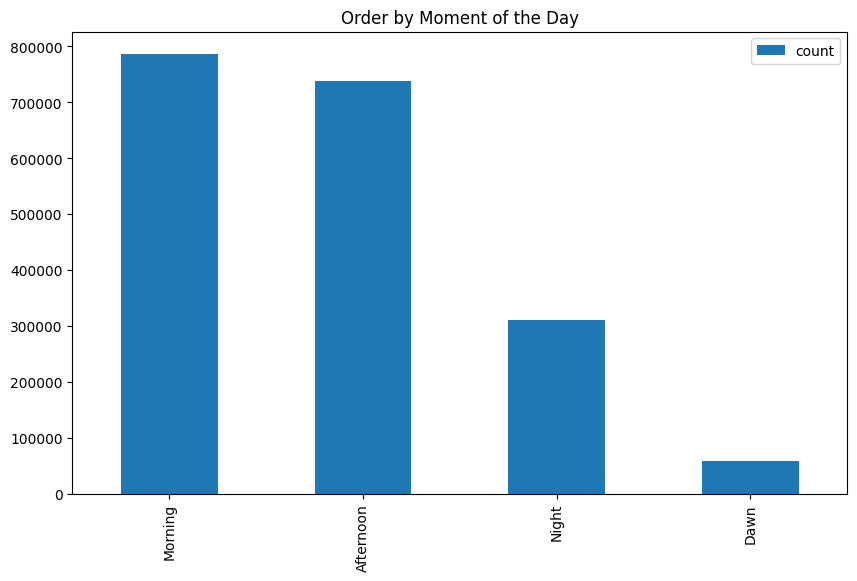

In [64]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(
    kind='bar',
    title='Order by Moment of the Day',
    xlabel='',
    figsize=(10, 6)
)

Se realiza el análisis de la cantidad de ordenes agrupadas por momento del día, en los diferentes 7 días de la semana.

In [66]:
pivot_table = df.pivot_table(index='day', columns='order_time_list', values='user_id', aggfunc='count')

correct_order = ['Dawn', 'Morning', 'Afternoon', 'Night']

pivot_table = pivot_table[correct_order]

print(pivot_table)

order_time_list   Dawn  Morning  Afternoon  Night
day                                              
Friday            7674    86588      84014  42603
Monday           10696   147980     152295  56442
Saturday          8040   104181      95263  39657
Sunday            8887   106820     103458  42821
Thursday          6752    90650      88108  38718
Tuesday           8320   149268     121606  48256
Wednesday         7333   101837      94248  42644


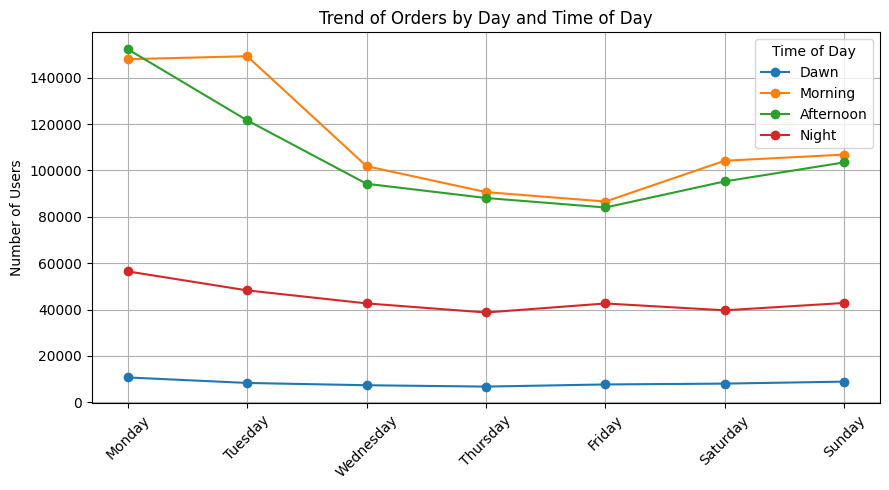

In [88]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table = pivot_table.reindex(days_order)

pivot_table.plot(
    kind='line',
    figsize=(9, 5),
    marker='o'
)

plt.title('Trend of Orders by Day and Time of Day')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

Se detecta que las tendencias de compra en la noche y la madrugada son relativamente estables, presentando una caida en el volumen de demanda desde el lunes hasta el jueves.

La mañana muestra un crecimiento de las compras desde el viernes que se mantiene hasta el martes, donde baja abruptamente estabilizandose hasta el viernes.

En el caso de la tarde, detectamos que este fenomeno es similar, con la diferencia de que el crecimiento en el volumen de compra se detiene el día lunes, donde baja abrupotamente hasta el viernes.

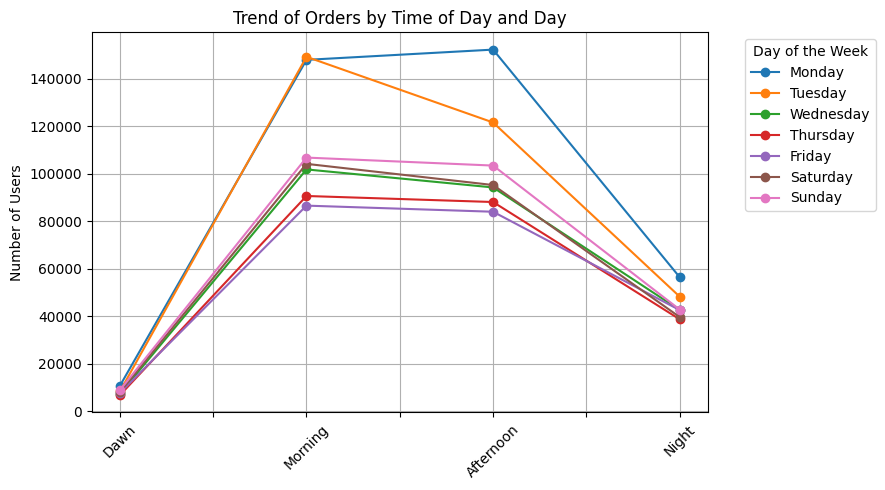

In [87]:
pivot_table_transposed.plot(
    kind='line',
    figsize=(9, 5),
    marker='o'
)

plt.title('Trend of Orders by Time of Day and Day')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Se encuentra que la mayor tendencia de compra se da entre la mañana y la tarde. Existe una gran tendencia de realizar compras los días lunes y martes; los lunes existe un pico de demanda por las tardes, y se detecta la particularidad de que los martes existe una caida significativa en el volumen de pedidos por las tardes a diferencia de en el resto de los días. 

A continuación se procede a realizar un análsis más exhaustivo de la cantidad de ordenes realizadas en las diferentes horas del día.

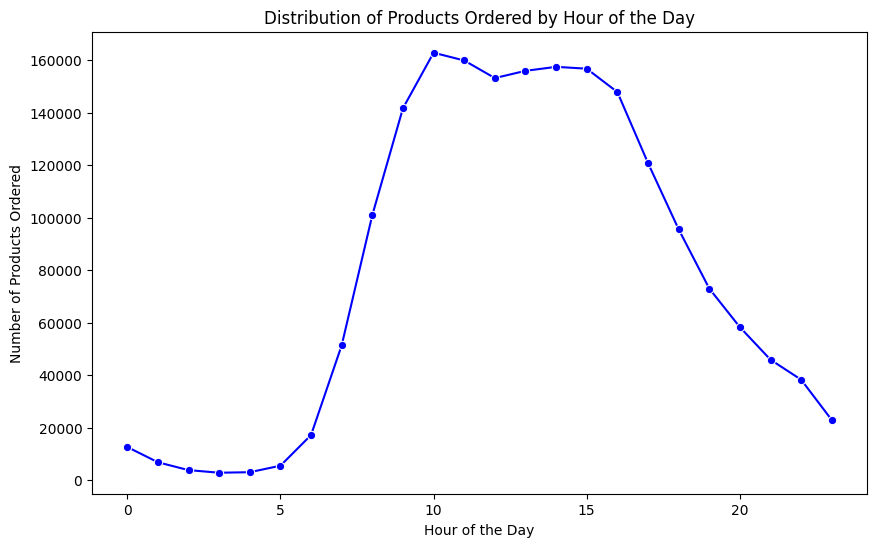

In [24]:
products_by_hour = df.groupby('order_hour_of_day')['product_id'].count().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', data=products_by_hour, marker='o', linestyle='-', color='b')

plt.title('Distribution of Products Ordered by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

plt.show()

El gráfico muestra como existe un crecimiento en el volumen de compra desde las 5 AM, este fenomeno se mantiene de forma proporcional hasta las 10 AM, donde muestra un leve retroceso para estabilizarse hasta las 3 PM y comenzar a bajar de forma proporcionalmente inversa al crecimiento detectado al inicio del día.

Finalizando con el análisis de compras por hora, se incluye la variable de los diferentes días de la semana para añadir mayor información.

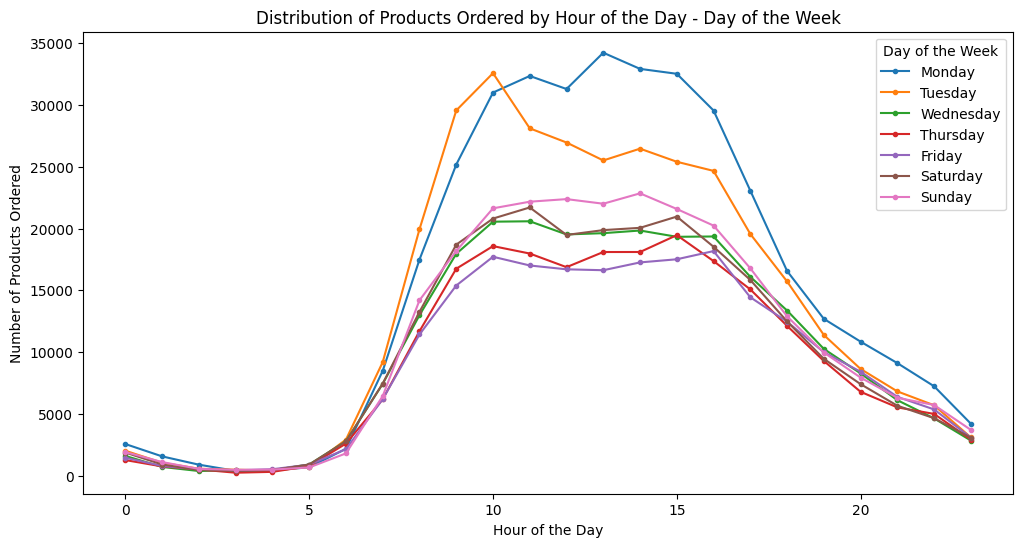

In [93]:
products_by_hour_dow = df.groupby(['day', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))

dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in dias_semana: 
    plt.plot(products_by_hour_dow.loc[day], label=day, marker='o', markersize=3)

plt.title('Distribution of Products Ordered by Hour of the Day - Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='Day of the Week', loc='upper right')

plt.show()

En este gráfico, se muestra de forma más clara el comportamiento diferenciado del día martes, donde se encuentra una reducción significativa en las compras realizadas a partir de las 10 AM.

En el resto de los días se encuentran comportamientos similares, particularmente se refleja como en los días lunes se realiza el mayor volumen de compras, y en los días viernes el menor nivel de demanda.

#### Top 10 de Productos Vendidos

De manera de encontrar cuales son los productos más solicitados, se decide implementar un ranking de los 10 productos más vendidos.

In [26]:
Most_sold_product = df.groupby("product_name")[['add_to_cart_order']].sum().reset_index()
top_10_products = Most_sold_product.sort_values(ascending = False, by = 'add_to_cart_order').head(10)

In [27]:
top_10_products.columns
px.bar(top_10_products, x= 'product_name', y= 'add_to_cart_order',color = 'add_to_cart_order', color_continuous_scale=["gray", "skyblue" ,"blue"])

El gráfico muestra como existe una mayor concentración de compra en "fresh vegetables" y "fresh fruits", diferenciandose en volumen en más del doble por la categoría de productos siguiente que es "packaged vegetables fruits", mostrando un decrecimiento exponencial.

#### Productos mas Reordenados segun Departamento

In [28]:
df['reordered'].value_counts()

reordered
1    1190986
0     704173
Name: count, dtype: int64

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

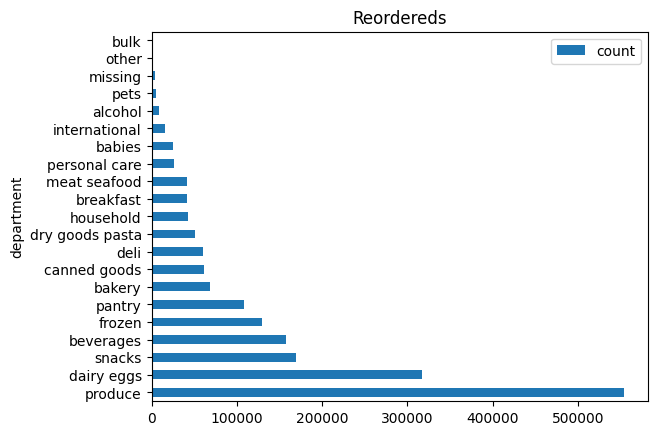

In [29]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='barh', title='Reordereds')

#### Segmentacion de Clientes por Cantidad de Ordenes

In [30]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

In [31]:
df.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order
206720,3070547,57442,12,5,14,7.00,24,18,0,4,produce,fresh fruits,Saturday,Afternoon,12
1461276,1262318,25276,49,3,11,0.00,61,2,0,19,snacks,cookies cakes,Thursday,Morning,98
1138996,2055316,181869,4,3,12,6.00,123,5,0,4,produce,packaged vegetables fruits,Thursday,Morning,4
772546,2176677,117004,6,0,22,21.00,83,3,1,4,produce,fresh vegetables,Monday,Night,6
736022,2471167,11335,24,0,12,13.00,131,18,1,9,dry goods pasta,dry pasta,Monday,Morning,24
1778894,2543004,192754,68,1,7,1.00,24,2,1,4,produce,fresh fruits,Tuesday,Morning,92
401238,344452,32930,17,1,13,12.00,83,6,0,4,produce,fresh vegetables,Tuesday,Afternoon,21
709980,599128,62459,10,3,9,12.00,83,3,1,4,produce,fresh vegetables,Thursday,Morning,10
238617,2309544,161673,6,1,18,5.00,24,3,1,4,produce,fresh fruits,Tuesday,Night,6
1313733,3343908,106387,5,6,20,30.00,123,6,1,4,produce,packaged vegetables fruits,Sunday,Night,5


In [32]:
def order_number_group(x):
    if x <= 20:
        x = '1-20 order'
    elif x >20 and x <=40:
        x = '21-40 order'
    elif x >40 and x <=60:
        x = '41-60 order'
    elif x >60 and x <=80:
        x = '61-80 order'
    else:
        x = '81-100 order'
    return x

In [33]:
df['order_number_group']=df['max_order'].apply(order_number_group)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
988556,3228044,27754,16,0,9,6.00,123,3,1,4,produce,packaged vegetables fruits,Monday,Morning,28,21-40 order
97179,2414325,197173,17,0,18,7.00,115,13,1,7,beverages,water seltzer sparkling water,Monday,Night,26,21-40 order
660467,1664571,197640,83,0,14,3.00,20,23,1,11,personal care,oral hygiene,Monday,Afternoon,90,81-100 order
1388467,1301452,115947,7,6,5,3.00,81,3,1,15,canned goods,canned jarred vegetables,Sunday,Dawn,7,1-20 order
787336,336142,126939,26,0,11,12.00,38,20,1,1,frozen,frozen meals,Monday,Morning,26,21-40 order


array([<Axes: ylabel='count'>], dtype=object)

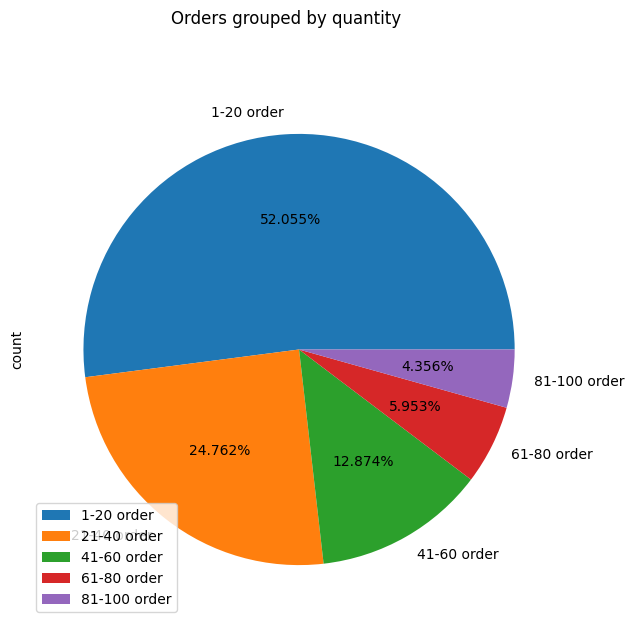

In [34]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.3f%%', subplots=True,
                                                                                                        title='Orders grouped by quantity', figsize=(10, 7))

#### Correlacion

In [35]:
df2 = df.copy()

##### Correlación variables numericas

In [36]:
df2['department'] = pd.factorize(df.department)[0]
df2['product_name'] = pd.factorize(df.product_name)[0]
df2['order_time_list'] = pd.factorize(df.order_time_list)[0]
df2['order_number_group'] = pd.factorize(df.order_number_group)[0]
df2['day'] = pd.factorize(df.order_number_group)[0]

In [37]:
df2.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
order_id,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01,-0.00
user_id,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
order_number,0.00,-0.00,1.00,0.01,-0.04,-0.36,0.00,-0.00,0.25,0.00,-0.02,-0.03,0.10,-0.01,0.76,0.10
order_dow,0.00,-0.00,0.01,1.00,0.01,-0.03,-0.00,-0.01,-0.01,0.00,0.01,0.01,0.01,0.02,0.02,0.01
order_hour_of_day,0.00,-0.00,-0.04,0.01,1.00,0.01,0.00,-0.02,-0.02,-0.01,0.01,0.01,-0.00,0.30,-0.04,-0.00
days_since_prior_order,-0.00,-0.00,-0.36,-0.03,0.01,1.00,0.01,0.05,-0.14,0.00,0.02,0.02,-0.02,-0.01,-0.45,-0.02
product_id,0.00,0.00,0.00,-0.00,0.00,0.01,1.00,0.01,0.00,0.06,-0.06,-0.01,0.00,0.00,-0.00,0.00
add_to_cart_order,-0.00,0.00,-0.00,-0.01,-0.02,0.05,0.01,1.00,-0.15,0.03,0.09,0.06,-0.01,-0.00,-0.01,-0.01
reordered,0.00,-0.00,0.25,-0.01,-0.02,-0.14,0.00,-0.15,1.00,-0.04,-0.14,-0.13,-0.00,0.00,0.22,-0.00
department_id,0.00,0.00,0.00,0.00,-0.01,0.00,0.06,0.03,-0.04,1.00,0.48,0.19,0.00,-0.00,0.00,0.00


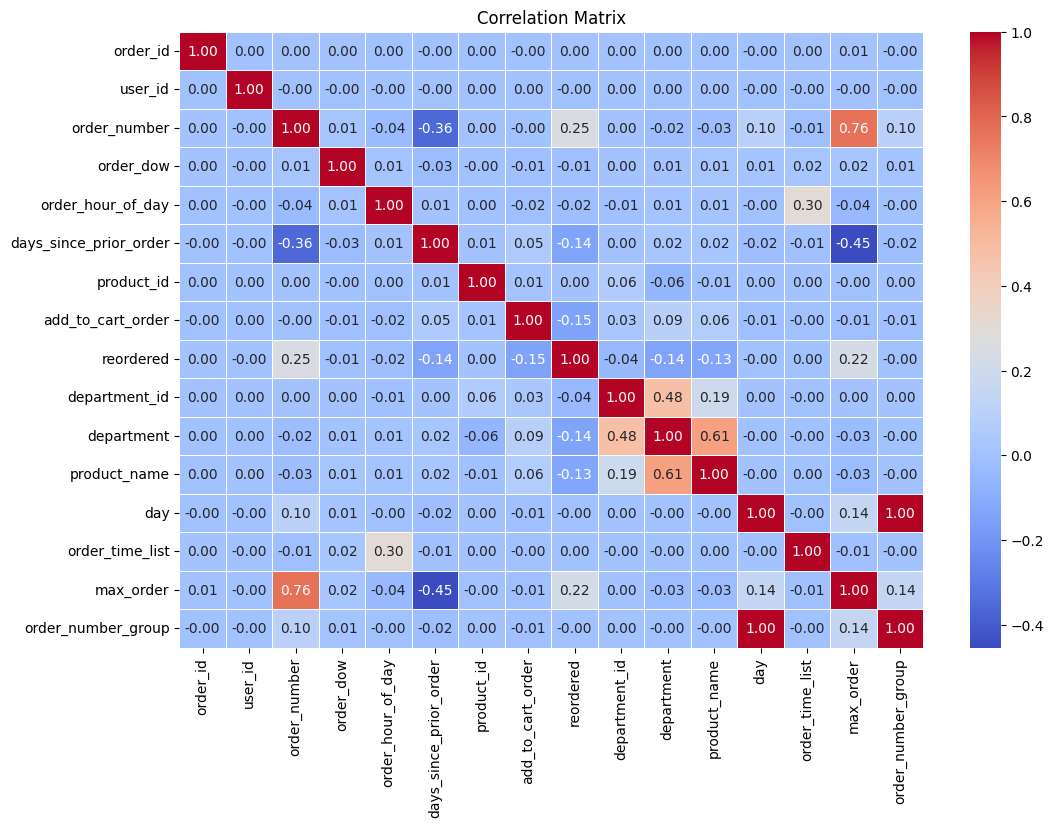

In [38]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##### Correlación de variables categoricas

In [39]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = ['department', 'product_name', 'day', 'order_time_list', 'order_number_group']

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

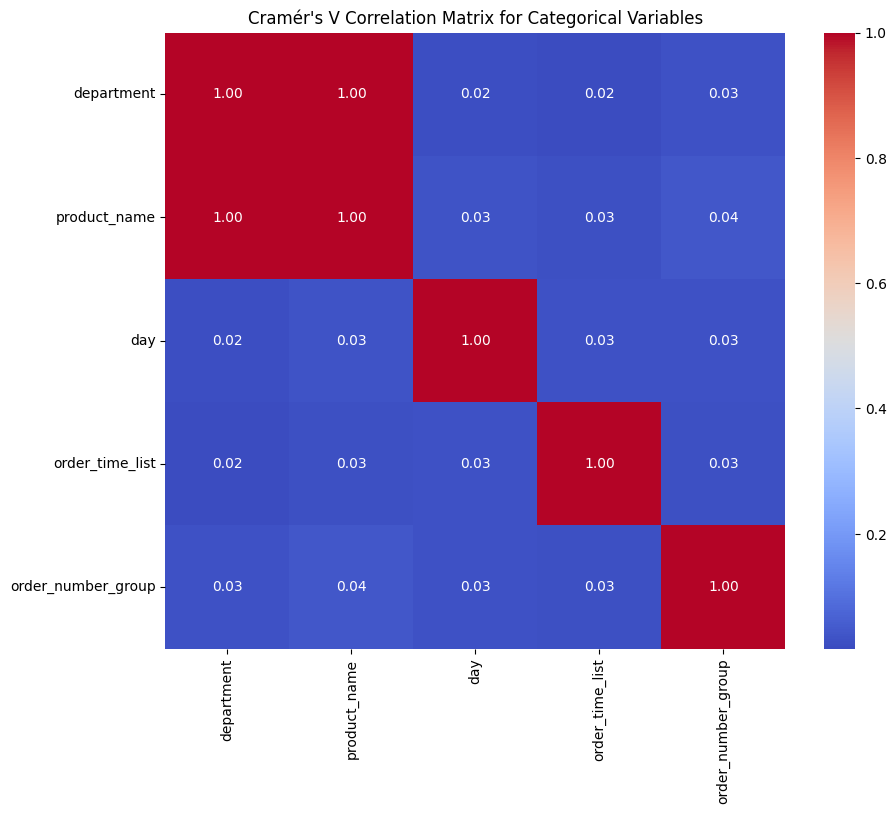

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

##### Pares de productos comprados juntos

C:\Users\marti\AppData\Local\Temp\ipykernel_56188\1648073766.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




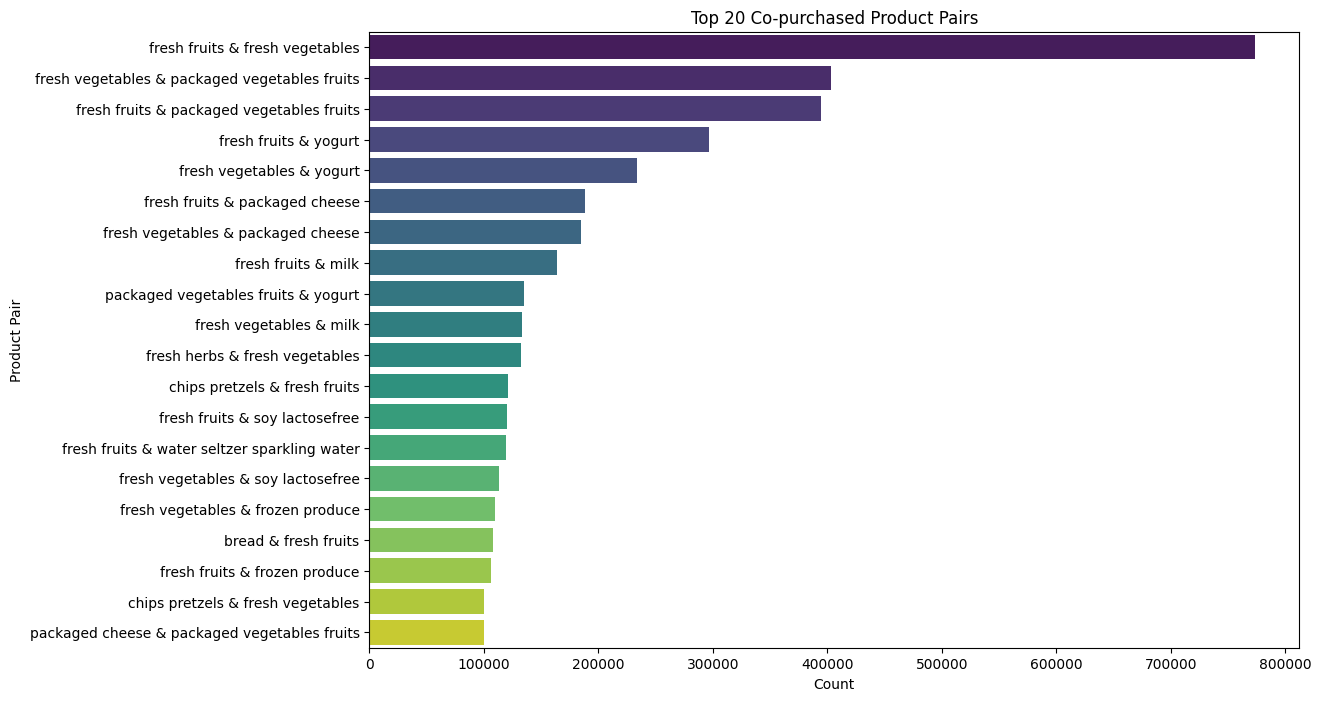

In [41]:
order_products = df[['order_id', 'product_name']]

merged_products = pd.merge(order_products, order_products, on='order_id')

co_purchased_products = merged_products[merged_products['product_name_x'] != merged_products['product_name_y']][['product_name_x', 'product_name_y']]

co_purchased_products['min_product'] = co_purchased_products[['product_name_x', 'product_name_y']].min(axis=1)
co_purchased_products['max_product'] = co_purchased_products[['product_name_x', 'product_name_y']].max(axis=1)

unique_pairs = co_purchased_products[['min_product', 'max_product']].value_counts().reset_index(name='count')

top_pairs = unique_pairs.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y=top_pairs['min_product'].astype(str) + ' & ' + top_pairs['max_product'].astype(str), data=top_pairs, palette='viridis')
plt.title('Top 20 Co-purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()

#### Outliers

In [42]:
product_counts = df['product_name'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of Products purchased:")
print(low_freq_products)

print("\Top 5% of Products purchased:")
print(high_freq_products)


Bottom 5% of Products purchased:
product_name
specialty wines champagnes    558
eye ear care                  550
kitchen supplies              517
baby accessories              476
baby bath body care           473
beauty                        354
frozen juice                  273
Name: count, dtype: int64
\Top 5% of Products purchased:
product_name
fresh fruits                     213224
fresh vegetables                 199526
packaged vegetables fruits       103016
yogurt                            85176
packaged cheese                   57683
milk                              52154
water seltzer sparkling water     49679
Name: count, dtype: int64


In [43]:
product_counts = df['department'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of purchases by Department:")
print(low_freq_products)

print("\nTop 5% of purchases by Department:")
print(high_freq_products)

Bottom 5% of purchases by Department:
department
other    2088
bulk     2036
Name: count, dtype: int64

Top 5% of purchases by Department:
department
produce       553916
dairy eggs    316966
Name: count, dtype: int64


In [44]:
product_counts = df['max_order'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% users:")
print(low_freq_products)

print("\nTop 5% users:")
print(high_freq_products)

Bottom 5% users:
max_order
89     3491
92     3434
84     3201
100    3182
91     3181
Name: count, dtype: int64

Top 5% users:
max_order
4    79580
3    74245
5    73050
2    66885
6    65331
Name: count, dtype: int64


In [45]:
product_counts = df['order_hour_of_day'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of time of day with orders :")
print(low_freq_products)

print("\nTop 5% of time of day with orders:")
print(high_freq_products)

Bottom 5% of time of day with orders :
order_hour_of_day
4    3052
3    2856
Name: count, dtype: int64

Top 5% of time of day with orders:
order_hour_of_day
10    162876
11    159915
Name: count, dtype: int64
